<a href="https://colab.research.google.com/github/hjzts/2025-Math-Modeling/blob/hj/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 模型构建

## 加载数据

In [87]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
%cd dataset
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/dataset
classified_country_medal_stats_after1950.csv	    noc_codes.json
classified_country_medal_stats_after1984.csv	    olympic_medals_2000-2020.csv
classified_country_medal_stats_after1984_useCV.csv  olympic_medals_with_noc.csv
classified_country_medal_stats.csv		    olympic_score_model.pkl
classified_country_medal_stats_cv.csv		    potential_stars.csv
country_clusters.csv				    potential_stars_filtered.csv
country.csv					    residual_plot.png
country_medal_clusters.csv			    robust_scaler.pkl
country_medal_probability.csv			    scatter_matrix.png
country_medal_stats.csv				    score_validation.png
country_medal_vectors.csv			    sport_discipline.json
country_olympic_potential.csv			    sport_events.json
country_sport_correlation_top.csv		    sports_list.json
country_sport_medal_vectors.csv			    summerOly_athletes.c

## 导入包

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 数据清洗

In [ ]:
noc_dict = {
    "Afghanistan": "AFG",
    "Albania": "ALB",
    "Algeria": "ALG",
    "Andorra": "AND",
    "Angola": "ANG",
    "Antigua and Barbuda": "ANT",
    "Argentina": "ARG",
    "Armenia": "ARM",
    "Aruba": "ARU",
    "American Samoa": "ASA",
    "Australia": "AUS",
    "Austria": "AUT",
    "Azerbaijan": "AZE",
    "Bahamas": "BAH",
    "Bangladesh": "BAN",
    "Barbados": "BAR",
    "Burundi": "BDI",
    "Belgium": "BEL",
    "Benin": "BEN",
    "Bermuda": "BER",
    "Bhutan": "BHU",
    "Bosnia and Herzegovina": "BIH",
    "Belize": "BIZ",
    "Belarus": "BLR",
    "Bolivia": "BOL",
    "Botswana": "BOT",
    "Brazil": "BRA",
    "Bahrain": "BRN",
    "Brunei": "BRU",
    "Bulgaria": "BUL",
    "Burkina Faso": "BUR",
    "Central African Republic": "CAF",
    "Cambodia": "CAM",
    "Canada": "CAN",
    "Cayman Islands": "CAY",
    "Republic of the Congo": "CGO",
    "Chad": "CHA",
    "Chile": "CHI",
    "China": "CHN",
    "Ivory Coast": "CIV",
    "Cameroon": "CMR",
    "Democratic Republic of the Congo": "COD",
    "Cook Islands": "COK",
    "Colombia": "COL",
    "Comoros": "COM",
    "Cape Verde": "CPV",
    "Costa Rica": "CRC",
    "Croatia": "CRO",
    "Cuba": "CUB",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DEN",
    "Djibouti": "DJI",
    "Dominica": "DMA",
    "Dominican Republic": "DOM",
    "Ecuador": "ECU",
    "Egypt": "EGY",
    "Eritrea": "ERI",
    "El Salvador": "ESA",
    "Spain": "ESP",
    "Estonia": "EST",
    "Ethiopia": "ETH",
    "Fiji": "FIJ",
    "Finland": "FIN",
    "France": "FRA",
    "Federated States of Micronesia": "FSM",
    "Gabon": "GAB",
    "The Gambia": "GAM",
    "Great Britain": "GBR",
    "Guinea-Bissau": "GBS",
    "Georgia": "GEO",
    "Equatorial Guinea": "GEQ",
    "Germany": "GER",
    "Ghana": "GHA",
    "Greece": "GRE",
    "Grenada": "GRN",
    "Guatemala": "GUA",
    "Guinea": "GUI",
    "Guam": "GUM",
    "Guyana": "GUY",
    "Haiti": "HAI",
    "Hong Kong": "HKG",
    "Honduras": "HON",
    "Hungary": "HUN",
    "Indonesia": "INA",
    "India": "IND",
    "Iran": "IRI",
    "Ireland": "IRL",
    "Iraq": "IRQ",
    "Iceland": "ISL",
    "Israel": "ISR",
    "Virgin Islands": "ISV",
    "Italy": "ITA",
    "British Virgin Islands": "IVB",
    "Jamaica": "JAM",
    "Jordan": "JOR",
    "Japan": "JPN",
    "Kazakhstan": "KAZ",
    "Kenya": "KEN",
    "Kyrgyzstan": "KGZ",
    "Kiribati": "KIR",
    "South Korea": "KOR",
    "Kosovo": "KOS",
    "Saudi Arabia": "KSA",
    "Kuwait": "KUW",
    "Laos": "LAO",
    "Latvia": "LAT",
    "Libya": "LBA",
    "Lebanon": "LBN",
    "Liberia": "LBR",
    "Saint Lucia": "LCA",
    "Lesotho": "LES",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Madagascar": "MAD",
    "Morocco": "MAR",
    "Malaysia": "MAS",
    "Malawi": "MAW",
    "Moldova": "MDA",
    "Maldives": "MDV",
    "Mexico": "MEX",
    "Mongolia": "MGL",
    "Marshall Islands": "MHL",
    "North Macedonia": "MKD",
    "Mali": "MLI",
    "Malta": "MLT",
    "Montenegro": "MNE",
    "Monaco": "MON",
    "Mozambique": "MOZ",
    "Mauritius": "MRI",
    "Mauritania": "MTN",
    "Myanmar": "MYA",
    "Namibia": "NAM",
    "Nicaragua": "NCA",
    "Netherlands": "NED",
    "Nepal": "NEP",
    "Nigeria": "NGR",
    "Niger": "NIG",
    "Norway": "NOR",
    "Nauru": "NRU",
    "New Zealand": "NZL",
    "Oman": "OMA",
    "Pakistan": "PAK",
    "Panama": "PAN",
    "Paraguay": "PAR",
    "Peru": "PER",
    "Philippines": "PHI",
    "Palestine": "PLE",
    "Palau": "PLW",
    "Papua New Guinea": "PNG",
    "Poland": "POL",
    "Portugal": "POR",
    "North Korea": "PRK",
    "Puerto Rico": "PUR",
    "Qatar": "QAT",
    "Romania": "ROU",
    "South Africa": "RSA",
    "Russia": "RUS",
    "Rwanda": "RWA",
    "Samoa": "SAM",
    "Senegal": "SEN",
    "Seychelles": "SEY",
    "Singapore": "SGP",
    "Saint Kitts and Nevis": "SKN",
    "Sierra Leone": "SLE",
    "Slovenia": "SLO",
    "San Marino": "SMR",
    "Solomon Islands": "SOL",
    "Somalia": "SOM",
    "Serbia": "SRB",
    "Sri Lanka": "SRI",
    "South Sudan": "SSD",
    "São Tomé and Príncipe": "STP",
    "Sudan": "SUD",
    "Switzerland": "SUI",
    "Suriname": "SUR",
    "Slovakia": "SVK",
    "Sweden": "SWE",
    "Eswatini": "SWZ",
    "Syria": "SYR",
    "Tanzania": "TAN",
    "Tonga": "TGA",
    "Thailand": "THA",
    "Tajikistan": "TJK",
    "Turkmenistan": "TKM",
    "Timor-Leste": "TLS",
    "Togo": "TOG",
    "Chinese Taipei": "TPE",
    "Trinidad and Tobago": "TTO",
    "Tunisia": "TUN",
    "Turkey": "TUR",
    "Tuvalu": "TUV",
    "United Arab Emirates": "UAE",
    "Uganda": "UGA",
    "Ukraine": "UKR",
    "Uruguay": "URU",
    "United States": "USA",
    "Uzbekistan": "UZB",
    "Vanuatu": "VAN",
    "Venezuela": "VEN",
    "Vietnam": "VIE",
    "Saint Vincent and the Grenadines": "VIN",
    "Yemen": "YEM",
    "Zambia": "ZAM",
    "Zimbabwe": "ZIM"
}

读入数据DataFrame

In [89]:
athletes = pd.read_csv('summerOly_athletes.csv')
hosts = pd.read_csv('summerOly_hosts.csv')
medal_counts = pd.read_csv('summerOly_medal_counts.csv')
programs = pd.read_csv('summerOly_programs.csv',encoding = 'latin-1')

programs数据清洗

In [90]:
# 读取 summerOly_programs.csv 文件，指定编码为 'latin1'
try:
    programs = pd.read_csv('summerOly_programs.csv', encoding='latin1')
except UnicodeDecodeError:
    # 如果 'latin1' 也不适用，尝试其他编码
    programs = pd.read_csv('summerOly_programs.csv', encoding='ISO-8859-1')

# 提取年份列（从 1896 到 2024）
year_columns = programs.columns[4:]  # 假设前 4 列是非年份列

# 定义一个函数，用于去除非数字部分并替换空值为 NaN，然后转换为整数
def clean_year_value(value):
    if pd.isna(value) or value == '' or value == ' ':
        return np.nan
    # 使用正则表达式提取数字部分
    import re
    numbers = re.findall(r'\d+', str(value))  # 提取所有数字
    if numbers:
        return int(numbers[0])  # 返回第一个数字并转换为整数
    else:
        return np.nan  # 如果没有数字，返回 NaN

# 对每一列应用清洗函数
for col in year_columns:
    programs[col] = programs[col].apply(clean_year_value)
    # 将列转换为整数类型，同时保留 NaN
    programs[col] = programs[col].astype('Int64')  # 使用 Pandas 的 'Int64' 类型支持 NaN

# 检查清洗后的数据
print(programs.head())
print(programs.info())

# 保存清洗后的数据到新文件（可选）
programs.to_csv('summerOly_programs_new.csv', index=False, encoding='utf-8')

      Sport         Discipline Code Sports Governing Body  1896  1900  1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics     0     0     0   
1  Aquatics             Diving  DIV        World Aquatics     0     0     2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics     0     0     0   
3  Aquatics           Swimming  SWM        World Aquatics     4     7     9   
4  Aquatics         Water Polo  WPO        World Aquatics     0     1     1   

   1906*  1908  1912  ...  1988  1992  1996  2000  2004  2008  2012  2016  \
0      0     0     0  ...     2     2     1     2     2     2     2     2   
1      1     2     4  ...     4     4     4     8     8     8     8     8   
2      0     0     0  ...     0     0     0     0     0     2     2     2   
3      4     6     9  ...    31    31    32    32    32    32    32    32   
4      0     1     1  ...     1     1     1     2     2     2     2     2   

   2020  2024  
0     2     2  
1     8     8  
2     2     2 

In [ ]:
athletes = athletes[athletes['NOC'].isin(noc_dict.values())]
athletes.to_csv('summerOly_athletes_new.csv')

medal_counts = medal_counts[medal_counts['NOC'].isin(noc_dict.keys())]
# 并将NOC通过noc_dict的映射关系转化为value
medal_counts['NOC'] = medal_counts['NOC'].map(noc_dict)
medal_counts.to_csv('summerOly_medal_counts_new.csv')

In [ ]:
athletes.info()
medal_counts.info()
medal_counts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 235187 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    235187 non-null  object
 1   Sex     235187 non-null  object
 2   Team    235187 non-null  object
 3   NOC     235187 non-null  object
 4   Year    235187 non-null  int64 
 5   City    235187 non-null  object
 6   Sport   235187 non-null  object
 7   Event   235187 non-null  object
 8   Medal   235187 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1294 non-null   int64 
 1   NOC     1294 non-null   object
 2   Gold    1294 non-null   int64 
 3   Silver  1294 non-null   int64 
 4   Bronze  1294 non-null   int64 
 5   Total   1294 non-null   int64 
 6   Year    1294 non-null   int64 
dtypes: int6

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,USA,11,7,2,20,1896
1,2,GRE,10,18,19,47,1896
2,3,GER,6,5,2,13,1896
3,4,FRA,5,4,2,11,1896
4,5,GBR,2,3,2,7,1896


1. 去重处理,确保每个国家、年份、event、奖牌类型只计算一次。

2. 计算每个国家每个event每年的奖牌数。

3. 计算每个国家每年的总奖牌数。

4. 合并这两个数据集。

5. 按event分组,计算每个event的奖牌数与总奖牌数的相关系数。

6. 找出相关系数最大的event。

In [91]:
df = pd.read_csv('summerOly_athletes_new.csv')

df = df.drop_duplicates(subset=['NOC', 'Year', 'Event', 'Medal'])

# 统计每个国家每年各项目的参加总数
event_all = df.groupby(['NOC', 'Year', 'Event'])['Medal'].count().reset_index(name='Event Total')
# print(event_all.head())

# 统计每个国家每年各项目的参加的奖牌数
df = df[df['Medal'] != 'No medal']
# 按国家-年份-项目分组统计奖牌数（已过滤无效条目）
event_medals = df.groupby(['NOC', 'Year', 'Event'])['Medal'].count().reset_index(name='Event Medals')
# print(event_medals.head())

# 计算每个国家每年的总奖牌数
total_medals = df.groupby(['NOC', 'Year'])['Medal'].count().reset_index(name='Total Medals')
# print(total_medals.head())

# 合并数据
merged = pd.merge(event_medals, total_medals, on=['NOC', 'Year'])
print(merged.head())

# 步骤5：按国家-项目分组计算相关性
# 定义计算相关性的函数（过滤数据不足的情况）
def calculate_correlation(group):
    if len(group) < 2:  # 至少需要2个数据点才能计算相关性
        return None
    return group['Event Medals'].corr(group['Total Medals'])

# 按国家-项目分组计算相关系数
corr_by_country_event = merged.groupby(['NOC','Event']).apply(calculate_correlation).dropna().reset_index()
corr_by_country_event.columns = ['NOC', 'Event', 'Correlation']
print(corr_by_country_event.head())

# 步骤6：找到每个国家相关性最高的项目
# 过滤无效值并排序
filtered_corr = corr_by_country_event.dropna().sort_values(['NOC', 'Correlation'], ascending=[True, False])
filtered_corr.to_csv('temp.csv')

# 取每个国家的最高相关性项目
max_corr_values = filtered_corr.groupby('NOC')['Correlation'].transform('max')
max_corr_per_country = filtered_corr[filtered_corr['Correlation'] == max_corr_values]
max_corr_per_country = max_corr_per_country.drop_duplicates().sort_values(['NOC', 'Event'])
# 展示结果
print("每个国家相关性最高的项目及相关系数：")
print(max_corr_per_country.head(10))
max_corr_per_country.to_csv('max_corr_event_per_country.csv')

   NOC  Year                           Event  Event Medals  Total Medals
0  AFG  2008       Taekwondo Men's Flyweight             1             1
1  AFG  2012   Taekwondo Men's Featherweight             1             1
2  ALB  2024            Men's Freestyle 65kg             1             2
3  ALB  2024            Men's Freestyle 74kg             1             2
4  ALG  1984  Boxing Men's Light-Heavyweight             1             2


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


   NOC                                Event  Correlation
0  AUS         Athletics Women's 100 metres     0.421637
1  AUS         Athletics Women's 200 metres     0.645971
2  AUS         Athletics Women's 400 metres    -0.905936
3  AUS  Athletics Women's 80 metres Hurdles     0.692052
4  AUS                 Cycling Men's Keirin    -1.000000
每个国家相关性最高的项目及相关系数：
    NOC                                          Event  Correlation
18  AUS                         Women's 200m Freestyle     1.000000
19  AUS                              Women's High Jump     1.000000
21  BEL        Equestrianism Mixed Jumping, Individual     1.000000
23  BEL                         Sailing Mixed 6 metres     1.000000
26  BLR                 Athletics Women's Discus Throw     1.000000
27  BLR                     Athletics Women's Shot Put     1.000000
28  BRA        Beach Volleyball Men's Beach Volleyball     0.181237
32  BUL               Weightlifting Men's Middleweight     0.948472
37  CAN                    

<ipython-input-91-8ddc9a924fcd>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_country_event = merged.groupby(['NOC','Event']).apply(calculate_correlation).dropna().reset_index()


In [98]:
max_corr_per_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 18 to 533
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOC          83 non-null     object 
 1   Event        83 non-null     object 
 2   Correlation  83 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.6+ KB


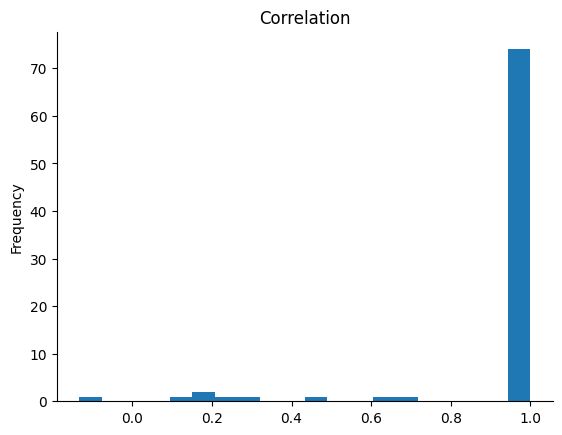

In [94]:
# @title Correlation

from matplotlib import pyplot as plt
max_corr_per_country['Correlation'].plot(kind='hist', bins=20, title='Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

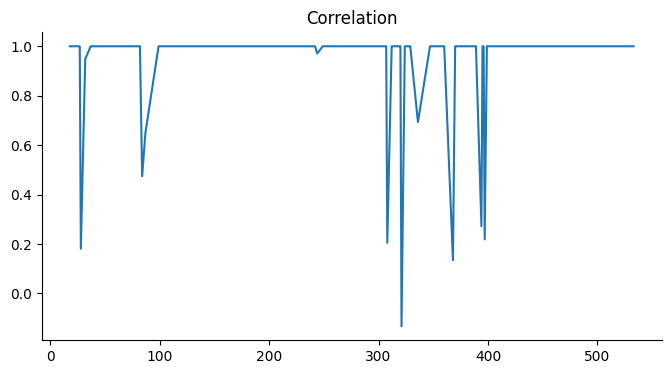

In [93]:
# @title Correlation

from matplotlib import pyplot as plt
max_corr_per_country['Correlation'].plot(kind='line', figsize=(8, 4), title='Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

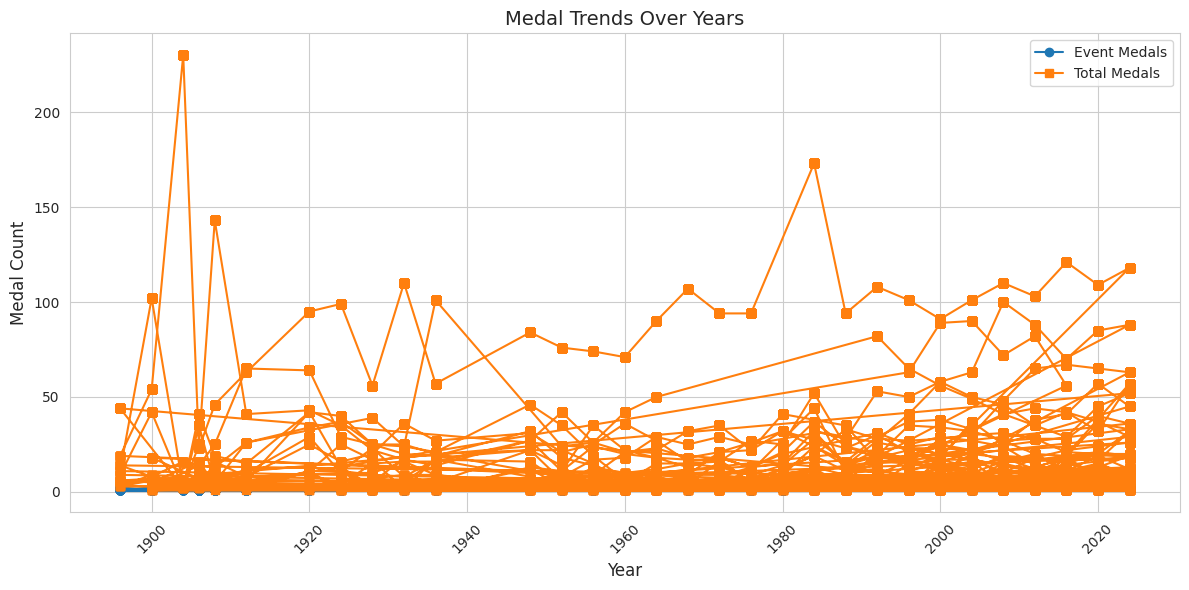

In [97]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # 设置背景网格

df = merged

plt.plot(df["Year"], df["Event Medals"], label="Event Medals", color="#1f77b4", marker="o")
plt.plot(df["Year"], df["Total Medals"], label="Total Medals", color="#ff7f0e", marker="s")
plt.title("Medal Trends Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Medal Count", fontsize=12)
plt.legend()
plt.xticks(rotation=45)  # 避免年份标签重叠
plt.tight_layout()
plt.show()

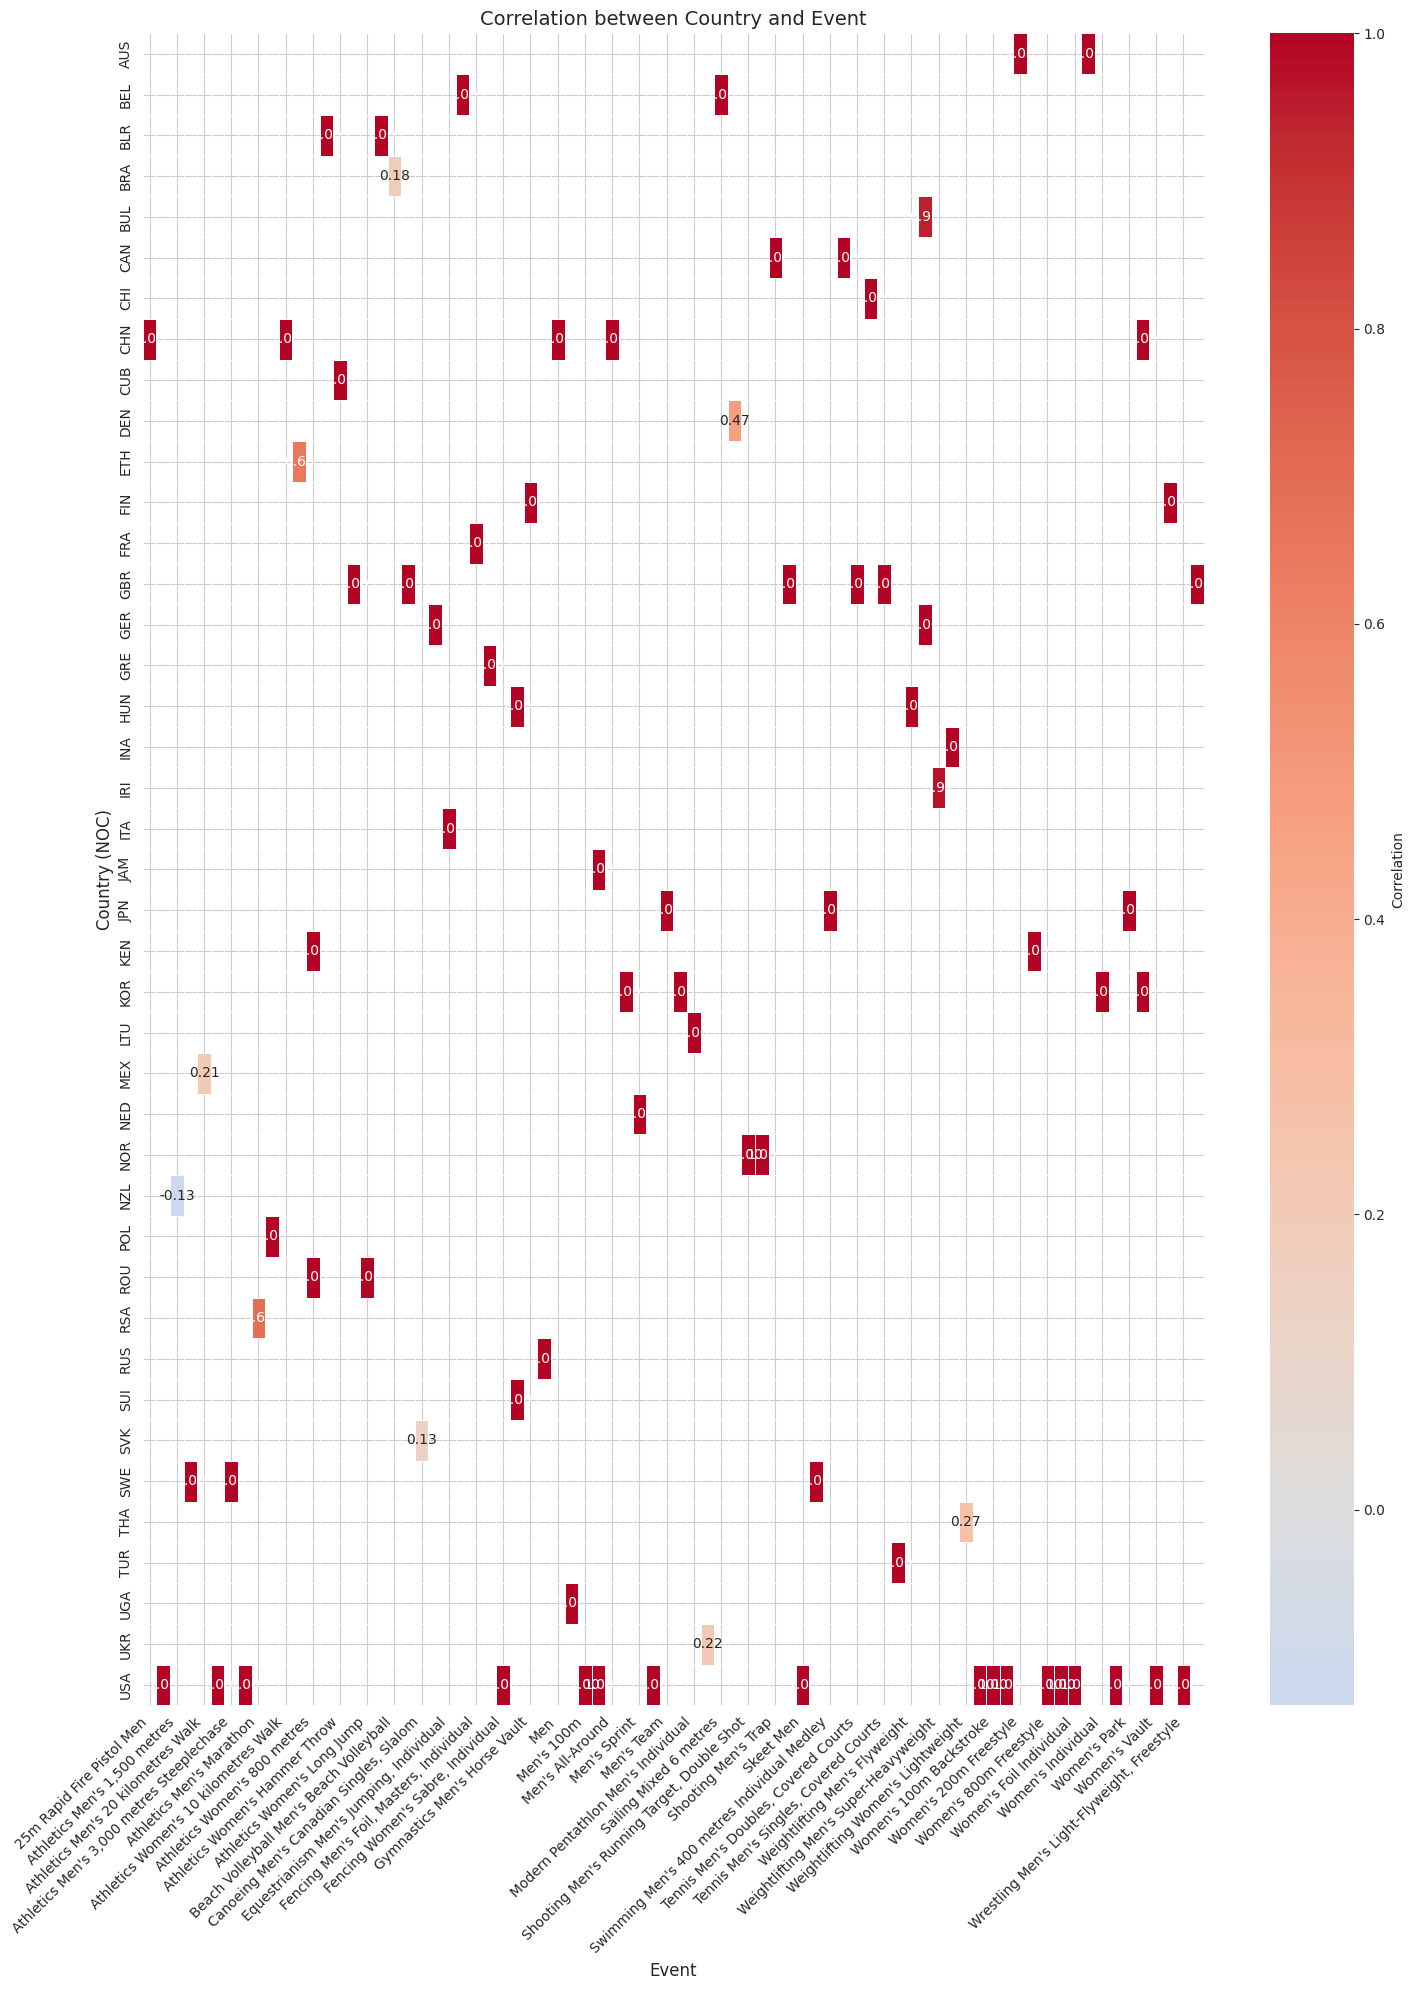

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 将数据转换为矩阵形式（国家为行，项目为列）
df = max_corr_per_country

corr_matrix = df.pivot(index="NOC", columns="Event", values="Correlation")

plt.figure(figsize=(15, 20))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",  # 红-蓝表示正负相关
    center=0,
    annot=True,       # 显示数值
    fmt=".2f",        # 小数格式
    linewidths=0.5,
    cbar_kws={"label": "Correlation"}
)
plt.title("Correlation between Country and Event", fontsize=14)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Country (NOC)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # 旋转项目标签
plt.tight_layout()
# plt.show()
# 图片保存至correlation between country and event
plt.savefig('correlation_between_country_and_event.png')
plt.show()

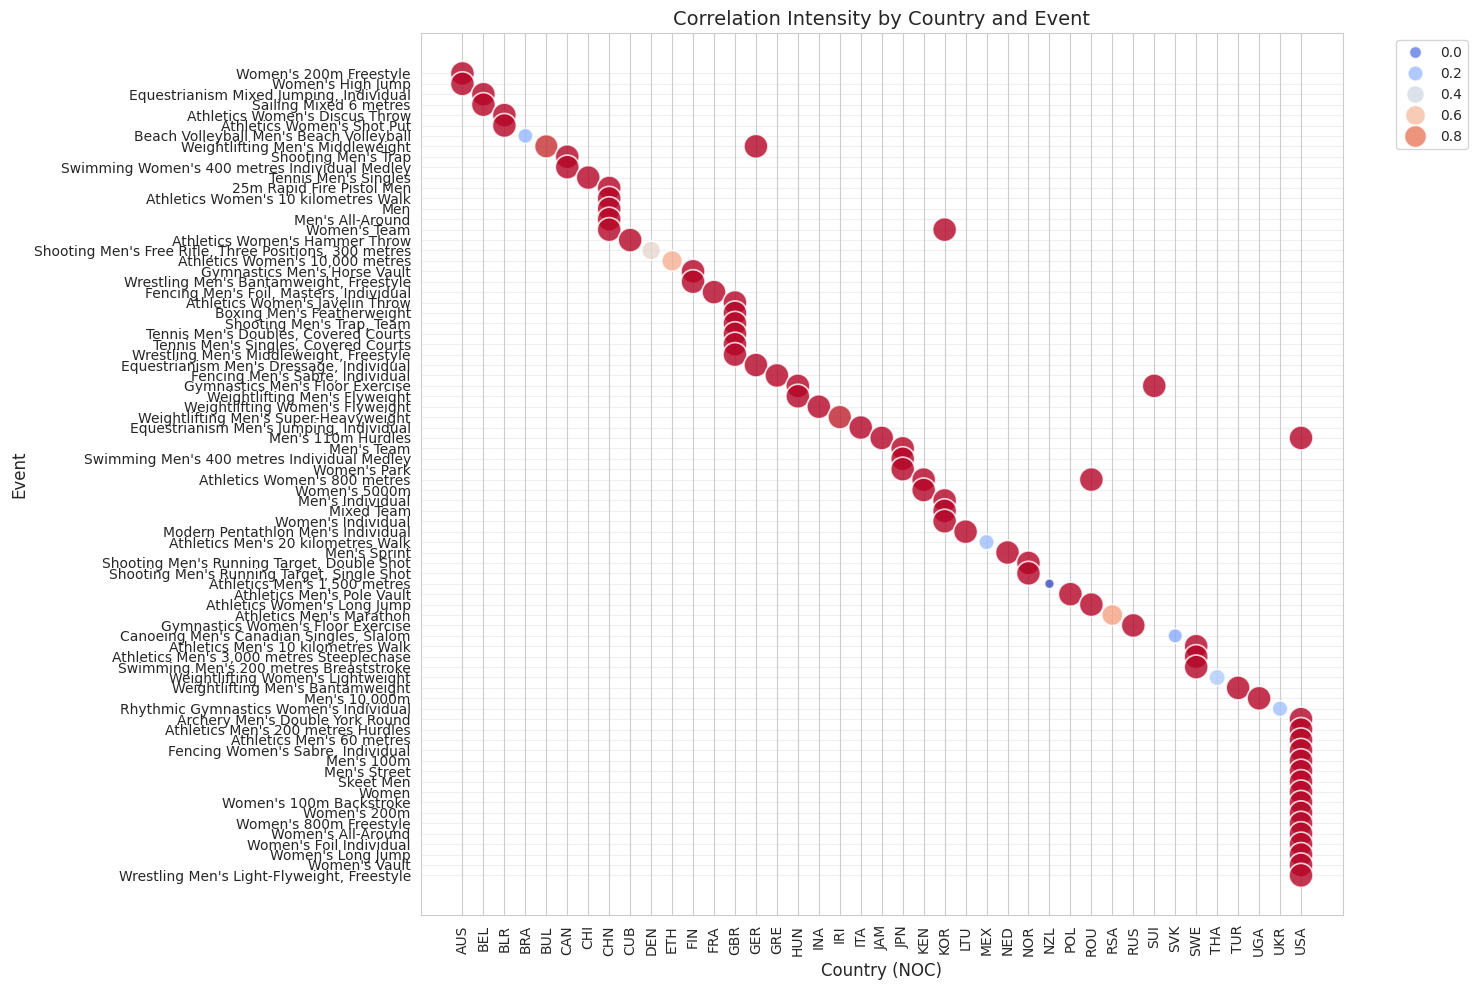

In [103]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df,
    x="NOC",
    y="Event",
    size="Correlation",
    hue="Correlation",
    sizes=(50, 300),   # 气泡大小范围
    palette="coolwarm",
    alpha=0.8
)
plt.title("Correlation Intensity by Country and Event", fontsize=14)
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Event", fontsize=12)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例位置
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

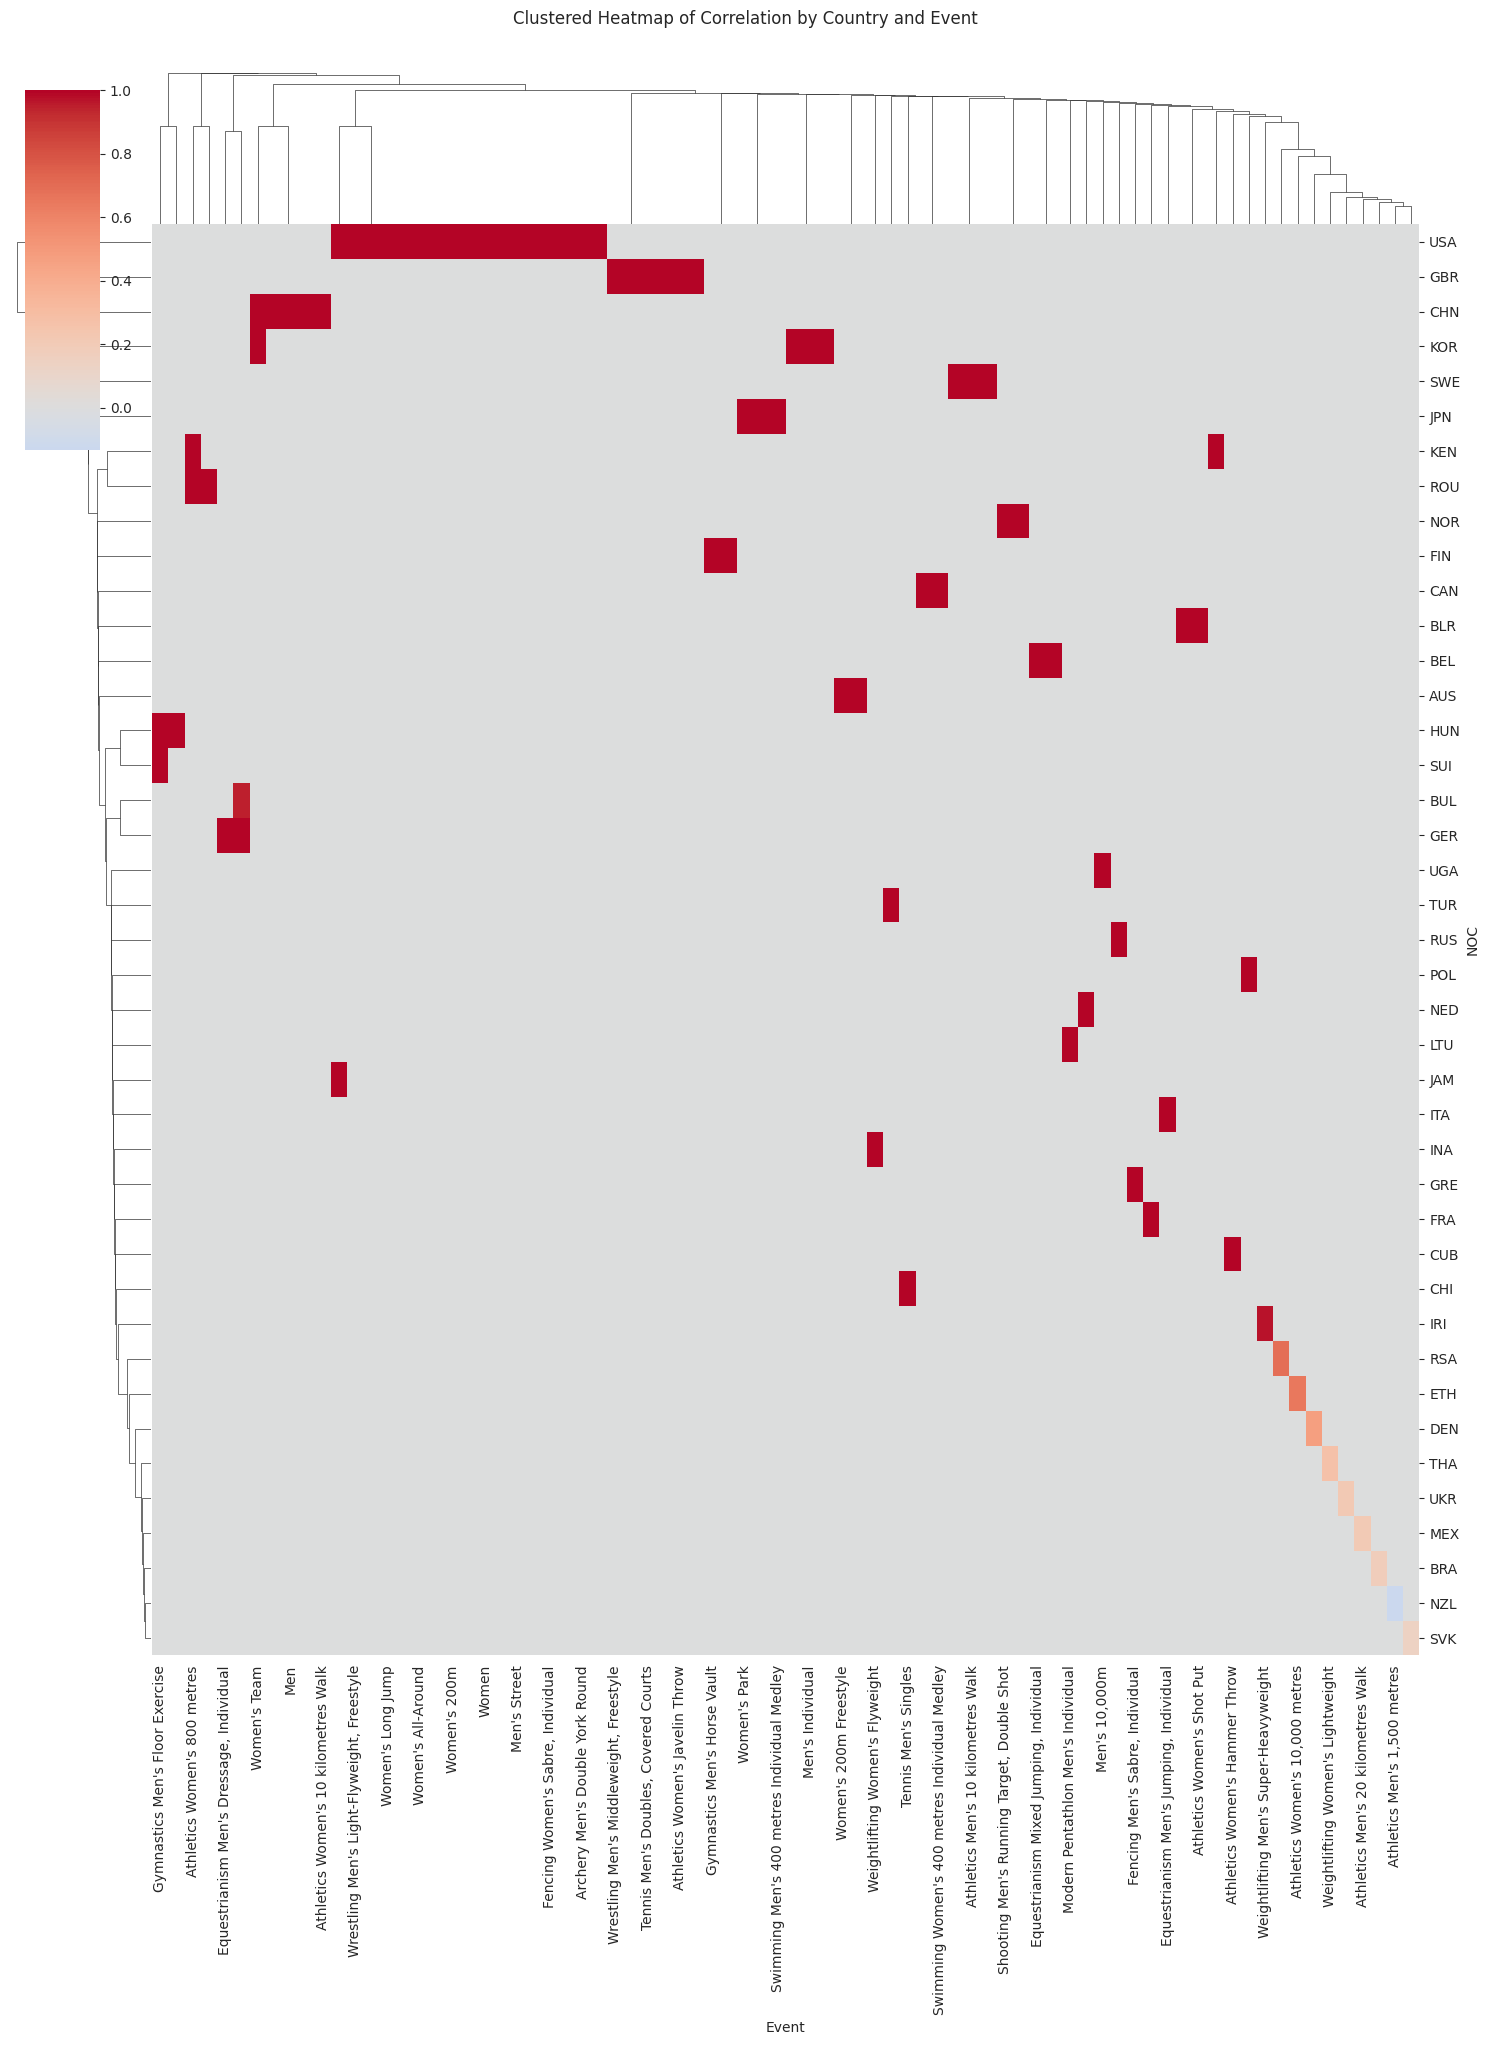

In [105]:

# 使用层次聚类对行（国家）和列（项目）重新排序
sns.clustermap(
    corr_matrix.fillna(0),  # 处理缺失值
    cmap="coolwarm",
    center=0,
    figsize=(15, 20),
    dendrogram_ratio=0.1,   # 调整树状图大小
    cbar_pos=(0.02, 0.8, 0.05, 0.18)  # 调整颜色条位置
)
plt.suptitle("Clustered Heatmap of Correlation by Country and Event", y=1.02)
plt.savefig('clustered_heatmap_of_correlation_by_country_and_event.png')
plt.show()

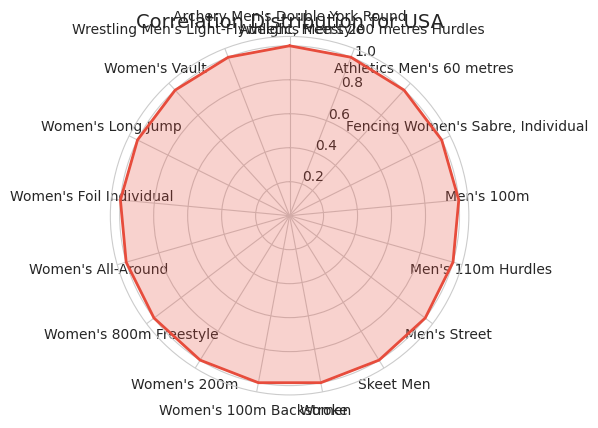

In [106]:
import numpy as np

def plot_radar_chart(noc, df):
    country_data = df[df["NOC"] == noc]
    categories = country_data["Event"].tolist()
    values = country_data["Correlation"].tolist()
    N = len(categories)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]  # 闭合图形
    angles += angles[:1]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, color="#e74c3c", linewidth=2)
    ax.fill(angles, values, color="#e74c3c", alpha=0.25)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
    ax.set_title(f"Correlation Distribution for {noc}", fontsize=14)
    plt.tight_layout()

# 示例：绘制某国家的雷达图
plot_radar_chart("USA", df)